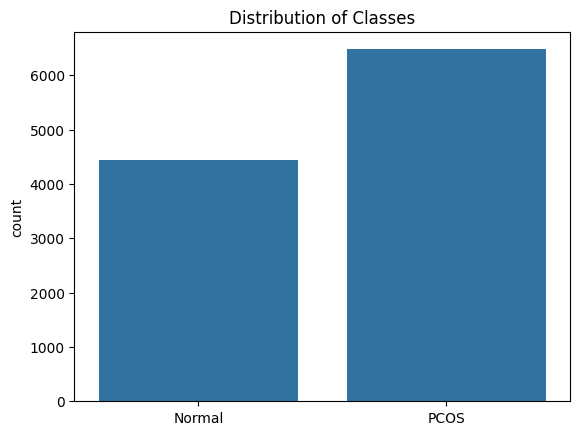

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Define paths to training and test directories
train_dir = 'C:/Users/ASUS/Downloads/PCOS/org/train'
test_dir = 'C:/Users/ASUS/Downloads/PCOS/org/test'

# Create a list of labels based on number of images in each class folder
labels = ['Normal'] * len(os.listdir(train_dir + '/normal')) + ['PCOS'] * len(os.listdir(train_dir + '/pcos'))

# Plot the count of each class in the training dataset
sns.countplot(x=labels)
plt.title('Distribution of Classes')
plt.show()


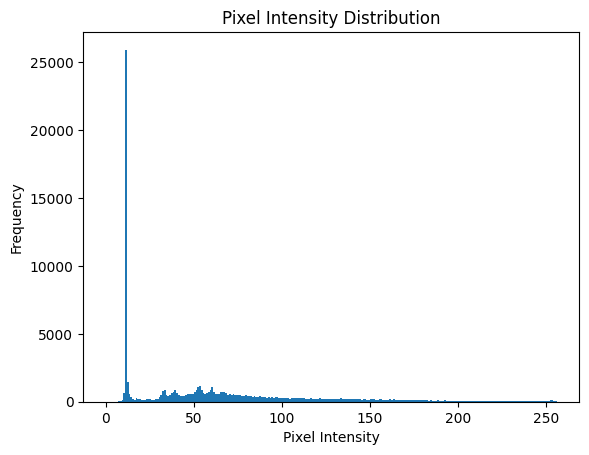

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Load a sample grayscale image from the PCOS training folder
img_sample = cv2.imread(train_dir + '/pcos/' + os.listdir(train_dir + '/pcos')[0], 0)  # 0 loads image in grayscale

# Plot histogram of pixel intensities for the image
plt.hist(img_sample.ravel(), bins=256, range=[0,256])
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


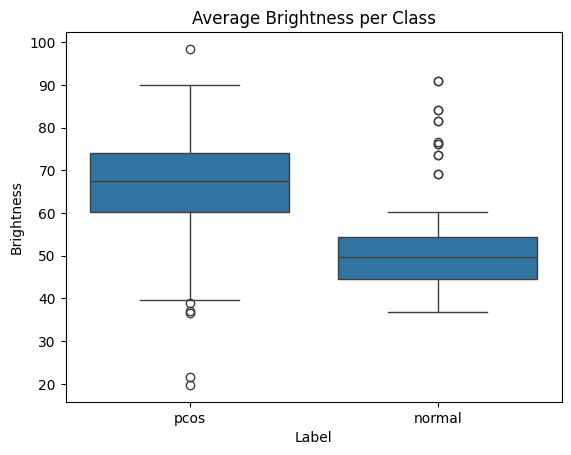

In [3]:
import pandas as pd

brightness = []  # to store average brightness of each image
labels = []      # to store corresponding image labels

# Loop through both categories: 'pcos' and 'normal'
for category in ['pcos', 'normal']:
    path = os.path.join(train_dir, category)
    # Read first 100 images from each category
    for img_file in os.listdir(path)[:100]:  
        img = cv2.imread(os.path.join(path, img_file), 0)  # load image in grayscale
        brightness.append(np.mean(img))  # calculate and store average pixel brightness
        labels.append(category)          # store label

# Create DataFrame from brightness and labels
df = pd.DataFrame({'Brightness': brightness, 'Label': labels})

# Plot boxplot comparing brightness between categories
sns.boxplot(x='Label', y='Brightness', data=df)
plt.title("Average Brightness per Class")
plt.show()


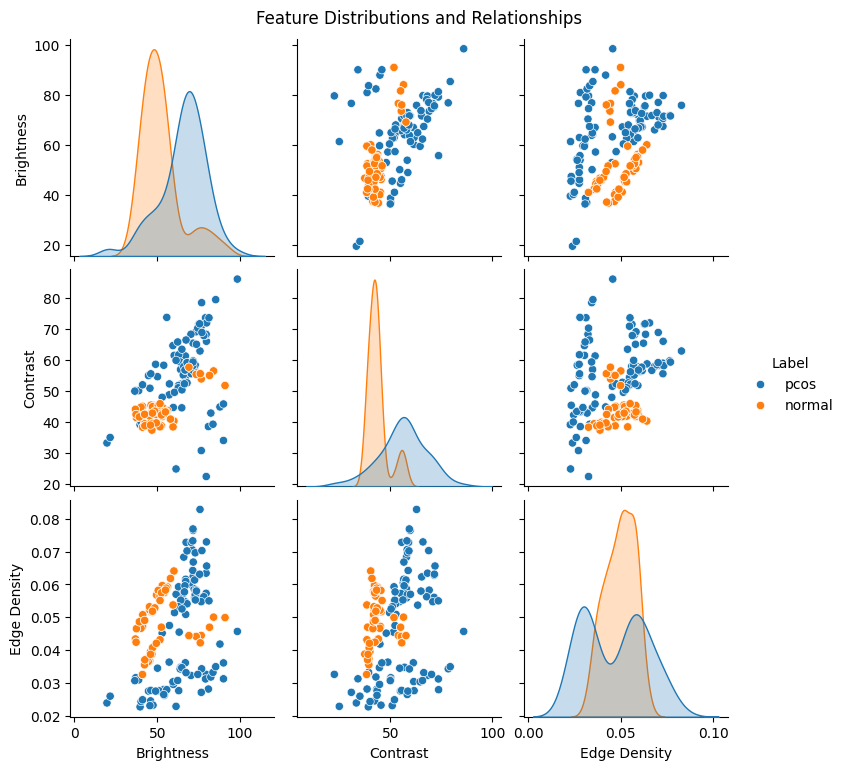

In [4]:
from skimage import filters

def extract_features(img_path):
    img = cv2.imread(img_path, 0)              # Load image in grayscale
    img = cv2.resize(img, (224, 224))          # Resize to 224x224
    brightness = np.mean(img)                   # Calculate average brightness
    contrast = img.std()                        # Calculate contrast (standard deviation)
    edges = filters.sobel(img)                  # Apply Sobel filter to detect edges
    edge_density = np.mean(edges)               # Calculate average edge intensity (edge density)
    return brightness, contrast, edge_density

features = []  # To store feature vectors
labels = []    # To store corresponding labels

# Loop over categories and images to extract features
for category in ['pcos', 'normal']:
    path = os.path.join(train_dir, category)
    for img_file in os.listdir(path)[:100]:    # Limit to first 100 images per category
        brightness, contrast, edge_density = extract_features(os.path.join(path, img_file))
        features.append([brightness, contrast, edge_density])
        labels.append(category)

# Create a DataFrame for features and labels
feature_df = pd.DataFrame(features, columns=['Brightness', 'Contrast', 'Edge Density'])
feature_df['Label'] = labels

# Visualize pairwise relationships of features, colored by class label
sns.pairplot(feature_df, hue='Label')
plt.suptitle("Feature Distributions and Relationships", y=1.02)
plt.show()


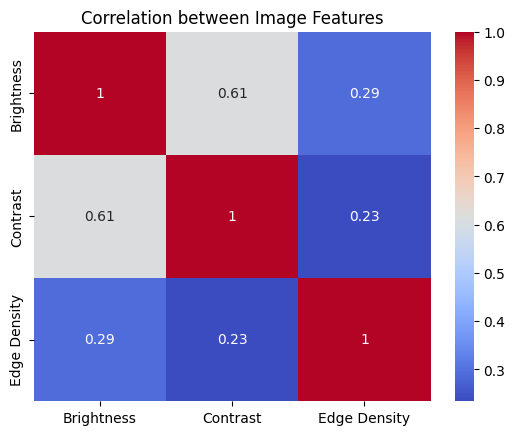

In [5]:
# Calculate and plot the correlation matrix between the features
sns.heatmap(feature_df.drop(columns=['Label']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Image Features")
plt.show()